## 1. Introdução

A análise de dados qualitativos pode ser realizada de forma tradicional, baseada em leitura, categorização e interpretação manual, ou de forma assistida por computador (*Computer-Assisted Qualitative Data Analysis Software – CAQDAS*).  
Na ciência de dados, adota-se uma abordagem algorítmica, estruturando os dados de forma numérica para permitir a aplicação de métodos estatísticos e de aprendizado de máquina.

O objetivo dessa abordagem é **identificar padrões, associações e dimensões latentes** presentes nos dados textuais ou categóricos, sem perder a riqueza semântica.  
O processo geralmente segue estas etapas:

1. **Pré-processamento:** limpeza e transformação dos dados qualitativos em representações numéricas.
2. **Exploração e redução de dimensionalidade:** uso de métodos como análise de correspondência, LSA ou LDA.
3. **Visualização:** produção de mapas perceptuais, gráficos de associação e representações fatoriais para interpretação.

Essa forma de análise permite tratar grandes volumes de dados qualitativos de forma mais objetiva e reprodutível, ampliando a capacidade de descoberta de padrões relevantes.



---



## 2. Pré-Processamento

O pré-processamento é a etapa que transforma dados qualitativos, geralmente textuais, em representações numéricas adequadas para aplicação de algoritmos estatísticos e de aprendizado de máquina.  
Essa etapa é fundamental para reduzir ruído, padronizar informações e permitir comparações consistentes.

### Etapas Comuns

1. **Limpeza dos dados**  
   - Remoção de caracteres especiais, números e sinais desnecessários.  
   - Conversão para minúsculas para padronização.

2. **Tokenização**  
   - Segmentação do texto em unidades menores (palavras ou *n*-gramas).  
   - Exemplo: "Análise de dados qualitativos" → ["análise", "de", "dados", "qualitativos"].

3. **Remoção de *stopwords***  
   - Exclusão de palavras sem carga semântica relevante (ex.: "de", "o", "em").  
   - Reduz o tamanho do vocabulário e melhora o foco da análise.

4. **Lematização ou *Stemming***  
   - Redução das palavras às suas formas base.  
   - Exemplo: "correndo", "correu" → "correr".

5. **Vetorização**  
   - Conversão do texto em uma matriz numérica (documento × termo).  
   - Técnicas comuns:
     - **Bag of Words (BoW):** conta simples de ocorrências.
     - **TF-IDF:** pondera termos pela importância relativa no corpus.
     - **Embeddings:** representações densas em espaço vetorial, preservando relações semânticas.

### Representação Matemática

Para uma matriz documento-termo com $m$ documentos e $n$ termos, a representação BoW pode ser escrita como:

$$
X_{ij} = \text{número de ocorrências do termo } j \text{ no documento } i
$$

No caso do TF-IDF, o peso é dado por:

$$
\text{TF-IDF}(t,d) = \text{TF}(t,d) \times \log \left( \frac{N}{1 + \text{DF}(t)} \right)
$$

onde:  
- $TF(t,d)$ é a frequência do termo $t$ no documento $d$,  
- $N$ é o número total de documentos,  
- $DF(t)$ é o número de documentos que contêm o termo $t$.

Essa matriz é a base para análises posteriores como análise de correspondência, redução de dimensionalidade e extração de tópicos.


In [ ]:
# %%
# Exemplo de Bag of Words com scikit-learn

from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

# 1. Carregar um subconjunto do dataset 20newsgroups
categorias = ['sci.space', 'rec.autos']
dados = fetch_20newsgroups(subset='train', categories=categorias, remove=('headers', 'footers', 'quotes'))

# 2. Criar o vetor de Bag of Words
vectorizer = CountVectorizer(max_features=10)  # pegando só os 10 termos mais frequentes para facilitar a visualização
X = vectorizer.fit_transform(dados.data)

# 3. Transformar em DataFrame para exibir de forma legível
df_bow = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())

# 4. Imprimir amostras da tabela documento-termo
print("=== Primeiros documentos (textos originais, reduzidos para 200 caracteres) ===")
for i, texto in enumerate(dados.data[:3]):
    print(f"\nDocumento {i+1}:\n{texto[:200]}...")

print("\n=== Matriz Bag of Words (primeiros 5 documentos) ===")
display(df_bow.head())


=== Primeiros documentos (textos originais, reduzidos para 200 caracteres) ===

Documento 1:
Well thank you dennis for your as usual highly detailed and informative 
posting.   

The question i have about the proton, is  could it be  handled at
one of KSC's spare pads, without major  malfunct...

Documento 2:


Perhaps a nice used '88 Pontiac Fiero GT?  2.8 liters.

Does anyone know if the motor mounts for the 2.8 and the twin-dual-cam 3.4
liter match?  The 3.4 is supposedly derived from the pushrod 3.1, w...

Documento 3:
I bought a car with a defunct engine, to use for parts
for my old but still running version of the same car.

The car I bought has good tires.

Is there anything in particular that I should do to
stor...

=== Matriz Bag of Words (primeiros 5 documentos) ===


,and,for,in,is,it,of,on,that,the,to
0,1,2,0,1,7,1,0,0,5,3
1,1,2,2,1,0,1,0,0,6,0
2,0,3,2,2,2,3,0,1,7,6
3,9,3,4,7,2,2,3,2,24,8
4,3,5,3,0,0,3,1,3,3,4


O código acima realiza as seguintes etapas:

1. **Carregamento dos dados:** foi utilizado o dataset `20newsgroups`, disponível no `scikit-learn`, com as categorias `sci.space` e `rec.autos`.
2. **Construção da Bag of Words:** com `CountVectorizer`, que gera a matriz documento-termo contando ocorrências de cada palavra.
3. **Visualização:** os primeiros documentos são mostrados parcialmente para referência e, em seguida, é exibida a matriz BoW para os primeiros 5 documentos, com as 10 palavras mais frequentes.

A matriz gerada possui a seguinte forma:

$$
X_{ij} = \text{quantidade de ocorrências do termo } j \text{ no documento } i
$$

Esta representação será utilizada em análises como **Análise de Correspondência** ou **redução de dimensionalidade**.


=== Matriz TF-IDF (primeiros 5 documentos) ===


,and,for,in,is,it,of,on,that,the,to
0,0.104911,0.248483,0.000000,0.114592,0.794655,0.103137,0.000000,0.000000,0.429598,0.295720
1,0.163972,0.388368,0.339143,0.179101,0.000000,0.161198,0.000000,0.000000,0.805732,0.000000
2,0.000000,0.353660,0.205889,0.217460,0.215430,0.293583,0.000000,0.109760,0.570673,0.561186
3,0.356033,0.140545,0.163641,0.302466,0.085612,0.077780,0.145696,0.087237,0.777552,0.297355
4,0.307801,0.607525,0.318312,0.000000,0.000000,0.302594,0.125959,0.339385,0.252081,0.385608


=== Comparativo por termo (média no corpus) ===


,BoW_mean,TFIDF_mean
and,3.360573,0.212020
for,1.639427,0.135303
in,2.405223,0.177261
is,2.105307,0.168511
it,1.728728,0.174036
of,3.547599,0.224712
on,1.378265,0.120662
that,1.700084,0.159429
the,8.407751,0.470721
to,3.751474,0.256330


=== Similaridade cosseno (BoW) — primeiros 6 documentos ===


,doc0,doc1,doc2,doc3,doc4,doc5
doc0,1.000,0.569,0.763,0.672,0.486,0.330
doc1,0.569,1.000,0.772,0.899,0.626,0.000
doc2,0.763,0.772,1.000,0.842,0.776,0.166
doc3,0.672,0.899,0.842,1.000,0.649,0.094
doc4,0.486,0.626,0.776,0.649,1.000,0.288
doc5,0.330,0.000,0.166,0.094,0.288,1.000


=== Similaridade cosseno (TF-IDF) — primeiros 6 documentos ===


,doc0,doc1,doc2,doc3,doc4,doc5
doc0,1.000,0.497,0.725,0.605,0.437,0.350
doc1,0.497,1.000,0.753,0.862,0.646,0.000
doc2,0.725,0.753,1.000,0.811,0.767,0.193
doc3,0.605,0.862,0.811,1.000,0.629,0.116
doc4,0.437,0.646,0.767,0.629,1.000,0.305
doc5,0.350,0.000,0.193,0.116,0.305,1.000


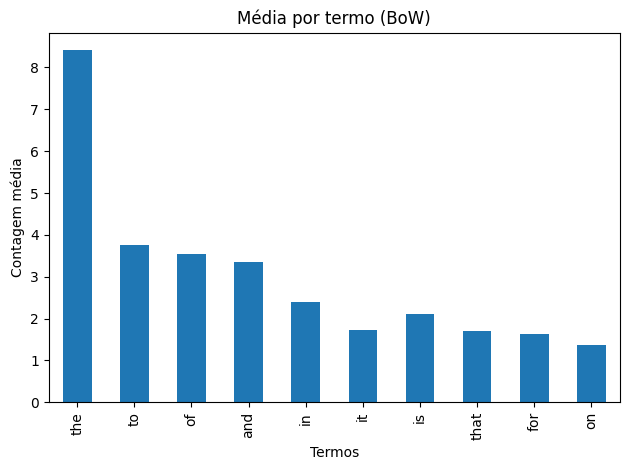

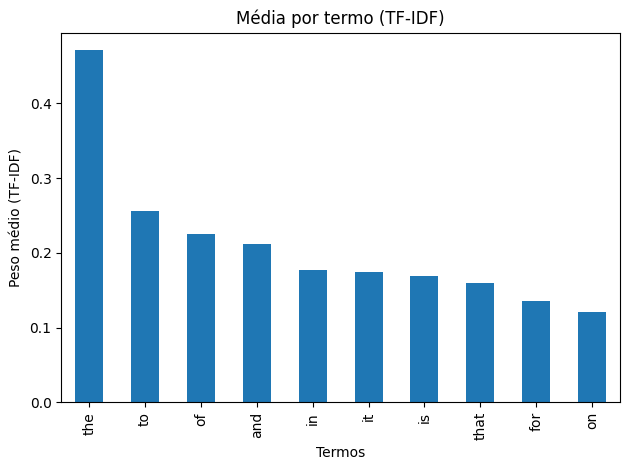

In [ ]:
# %%
# TF-IDF com o MESMO vocabulário da BoW e comparação

from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
import pandas as pd

# Garantir que as variáveis do bloco anterior existam.
try:
    _ = df_bow
    _ = vectorizer
    textos = dados.data
except NameError:
    # Se o bloco anterior não foi executado nesta sessão, reconstrói rapidamente:
    from sklearn.datasets import fetch_20newsgroups
    from sklearn.feature_extraction.text import CountVectorizer
    categorias = ['sci.space', 'rec.autos']
    dados = fetch_20newsgroups(subset='train', categories=categorias, remove=('headers', 'footers', 'quotes'))
    textos = dados.data
    vectorizer = CountVectorizer(max_features=10)
    X = vectorizer.fit_transform(textos)
    df_bow = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())

# 1) TF-IDF usando o MESMO vocabulário e mesma ordem de termos
tfidf_vec = TfidfVectorizer(vocabulary=vectorizer.get_feature_names_out())
X_tfidf = tfidf_vec.fit_transform(textos)
df_tfidf = pd.DataFrame(X_tfidf.toarray(), columns=tfidf_vec.get_feature_names_out())

print("=== Matriz TF-IDF (primeiros 5 documentos) ===")
display(df_tfidf.head())

# 2) Estatísticas por termo para comparar BoW x TF-IDF
bow_mean = df_bow.mean(axis=0).rename("BoW_mean")
tfidf_mean = df_tfidf.mean(axis=0).rename("TFIDF_mean")
comparativo = pd.concat([bow_mean, tfidf_mean], axis=1)

print("=== Comparativo por termo (média no corpus) ===")
display(comparativo.sort_index())

# 3) Similaridade entre documentos (cosine) sob BoW vs TF-IDF
from sklearn.metrics.pairwise import cosine_similarity

# limitar a poucos docs para visualização
n_docs = 6
cos_bow = cosine_similarity(df_bow.iloc[:n_docs], df_bow.iloc[:n_docs])
cos_tfidf = cosine_similarity(df_tfidf.iloc[:n_docs], df_tfidf.iloc[:n_docs])

df_cos_bow = pd.DataFrame(cos_bow, index=[f"doc{i}" for i in range(n_docs)], columns=[f"doc{i}" for i in range(n_docs)])
df_cos_tfidf = pd.DataFrame(cos_tfidf, index=[f"doc{i}" for i in range(n_docs)], columns=[f"doc{i}" for i in range(n_docs)])

print("=== Similaridade cosseno (BoW) — primeiros 6 documentos ===")
display(df_cos_bow.round(3))

print("=== Similaridade cosseno (TF-IDF) — primeiros 6 documentos ===")
display(df_cos_tfidf.round(3))

# %%
# Visualizações simples: médias por termo (BoW e TF-IDF) em gráficos separados

import matplotlib.pyplot as plt

# Ordenar termos por média TF-IDF decrescente só para estética
ordem = tfidf_mean.sort_values(ascending=False).index.tolist()

# Plot 1: médias BoW
plt.figure()
df_bow[ordem].mean(axis=0).plot(kind="bar")
plt.title("Média por termo (BoW)")
plt.xlabel("Termos")
plt.ylabel("Contagem média")
plt.tight_layout()
plt.show()

# Plot 2: médias TF-IDF
plt.figure()
df_tfidf[ordem].mean(axis=0).plot(kind="bar")
plt.title("Média por termo (TF-IDF)")
plt.xlabel("Termos")
plt.ylabel("Peso médio (TF-IDF)")
plt.tight_layout()
plt.show()


### Interpretação rápida

- A **tabela TF-IDF** mostra pesos reais não negativos, geralmente menores que 1, refletindo relevância relativa de cada termo por documento.
- No **comparativo por termo**, a BoW privilegia termos muito frequentes (contagens maiores). Já o **TF-IDF** reduz o peso de termos muito comuns e destaca termos mais específicos.
- Nas **matrizes de similaridade cosseno**, compare os padrões: com TF-IDF é comum observar uma separação mais nítida entre documentos de temas diferentes (p. ex., `sci.space` vs `rec.autos`), pois termos genéricos têm menor influência.

> Observação: usamos o **mesmo vocabulário** em BoW e TF-IDF para garantir comparabilidade coluna a coluna. Se você usar vocabulários distintos, compare apenas métricas globais (ex.: similaridade entre documentos), não colunas termo a termo.




---



## 3. Análise de Correspondência

A Análise de Correspondência é uma técnica exploratória multivariada aplicada a tabelas de contingência. Seu objetivo é representar graficamente as associações entre categorias de linhas e de colunas em um espaço de baixa dimensão, de modo análogo ao PCA, porém com métrica do qui quadrado apropriada a dados categóricos.

### 3.1 Dados de entrada e notação

Considere uma tabela de contingência $N = [n_{ij}]$ com $I$ linhas e $J$ colunas. O total é $n = \sum_{i=1}^{I}\sum_{j=1}^{J} n_{ij}$. Definem-se as frequências relativas
$$
P = \frac{1}{n}N \quad \text{com elementos} \quad p_{ij} = \frac{n_{ij}}{n}.
$$

Os perfis marginais são
$$
r_i = \sum_{j=1}^{J} p_{ij} \quad \text{para } i=1,\dots,I
\qquad
c_j = \sum_{i=1}^{I} p_{ij} \quad \text{para } j=1,\dots,J.
$$

Convenientemente, use as matrizes diagonais $D_r = \mathrm{diag}(r_1,\dots,r_I)$ e $D_c = \mathrm{diag}(c_1,\dots,c_J)$.

### 3.2 Distância qui quadrado e resíduos padronizados

CA trabalha no espaço dos **perfis de linha** e dos **perfis de coluna** com a distância do qui quadrado. A distância entre dois perfis de linha $i$ e $i'$ é
$$
d^2(i,i') = \sum_{j=1}^{J} \frac{1}{c_j}
\left(\frac{p_{ij}}{r_i} - \frac{p_{i'j}}{r_{i'}}\right)^2.
$$
Definição análoga vale para perfis de coluna.

Centraliza-se a matriz $P$ em relação ao produto dos marginais e padroniza-se pelos desvios
$$
S = D_r^{-1/2}\,\big(P - r c^{\top}\big)\,D_c^{-1/2}.
$$

### 3.3 Decomposição e coordenadas fatoriais

Aplica-se a decomposição em valores singulares
$$
S = U\,\Sigma\,V^{\top},
$$
onde $U$ e $V$ contêm os autovetores à esquerda e à direita e $\Sigma = \mathrm{diag}(\sigma_1,\sigma_2,\dots)$ contém os valores singulares.

As **coordenadas principais** para linhas e colunas nos eixos fatoriais são
$$
F = D_r^{-1/2}\,U\,\Sigma
\qquad
G = D_c^{-1/2}\,V\,\Sigma.
$$
Cada coluna de $F$ e de $G$ fornece as coordenadas no respectivo eixo fatorial. As **autovalores** são $\lambda_{\alpha} = \sigma_{\alpha}^2$ e medem a inércia explicada por cada eixo.

A **inércia total** é proporcional ao qui quadrado da tabela
$$
\mathcal{I}_{\text{total}} = \sum_{\alpha} \lambda_{\alpha} = \frac{\chi^2}{n}.
$$

### 3.4 Interpretação do mapa perceptual

O **mapa perceptual** projeta categorias de linha e de coluna nos primeiros eixos fatoriais.
- Proximidade entre categorias indica **associação** acima do esperado pelo acaso.
- Pontos distantes da origem contribuem mais para a inércia. Pontos próximos da origem possuem perfil próximo ao marginal.
- Linhas e colunas obedecem a uma relação baricêntrica. Coordenadas de linhas são médias ponderadas das colunas em que elas ocorrem, e vice versa.

Para avaliar importância e qualidade de representação
- **Contribuição** da categoria $i$ ao eixo $\alpha$
$$
\mathrm{CTR}_{i,\alpha} = \frac{r_i\,f_{i\alpha}^2}{\lambda_{\alpha}},
$$
onde $f_{i\alpha}$ é a coordenada de $i$ no eixo $\alpha$.
- **Coseno quadrado** da categoria $i$ no eixo $\alpha$
$$
\cos^2(i,\alpha) = \frac{f_{i\alpha}^2}{\sum_{\beta} f_{i\beta}^2},
$$
indicando qualidade de representação dessa categoria no plano fatoral considerado.

### 3.5 Passo a passo resumido

1. Construir $N$ e obter $P = N/n$.  
2. Calcular $r$, $c$, $D_r$, $D_c$.  
3. Formar $S = D_r^{-1/2}(P - rc^{\top})D_c^{-1/2}$.  
4. Aplicar SVD e obter $U$, $\Sigma$, $V$.  
5. Calcular coordenadas principais $F$ e $G$.  
6. Plotar as primeiras dimensões e interpretar por proximidade, contribuições e cosenos quadrados.

### 3.6 Boas práticas e cuidados

- Evitar categorias raras com frequências muito baixas. Pode se agrupar em Outros para estabilidade numérica.
- Verificar células com zero estrutural. Zeros esparsos causam distorções na distância do qui quadrado.
- Interpretar eixos a partir de categorias com maiores contribuições e bons $\cos^2$.
- Usar pontos suplementares quando quiser projetar categorias ou indivíduos que não participam do ajuste dos eixos.
- Lembrar que CA é descritiva. Associação não implica causalidade.

### 3.7 Relação com PCA e extensões

- CA é análoga ao PCA aplicado a **resíduos padronizados** da tabela de contingência sob a métrica do qui quadrado.  
- Para múltiplas variáveis categóricas codificadas como matriz indicadora completa, usa-se **Análise de Correspondência Múltipla**. A ideia é idêntica, com ponderação adequada das variáveis.


Categorias selecionadas: ['comp.graphics', 'rec.autos', 'sci.space', 'talk.politics.mideast']

=== Tabela de Contingência (categoria × termo) ===


,of,and,in,were,they,space,that,was,he,armenian,armenians,israel,turkish,people,their,jews,image,car,we,who
categoria,,,,,,,,,,,,,,,,,,,,
comp.graphics,1745,1961,1144,50,153,63,771,184,54,0,0,1,0,54,82,0,484,0,162,48
rec.autos,1243,1385,1027,111,415,6,880,358,118,0,0,0,0,80,103,1,2,515,116,102
sci.space,2968,2604,1828,189,429,989,1138,547,177,0,0,1,0,142,173,0,32,4,304,156
talk.politics.mideast,5880,5225,3926,1326,1894,13,2901,1751,1094,611,511,500,474,784,836,423,6,53,950,732



=== Dimensões ===
Linhas (categorias): 4
Colunas (termos):    20

=== Totais e perfis marginais ===
Total de ocorrências n: 54989
Perfil de linha r (por categoria):


,r
comp.graphics,0.126498
rec.autos,0.117514
sci.space,0.212424
talk.politics.mideast,0.543563


Perfil de coluna c (por termo):


,c
of,0.215243
and,0.203222
in,0.144120
were,0.030479
they,0.052574
space,0.019477
that,0.103475
was,0.051647
he,0.026242
armenian,0.011111



=== Autovalores (inércia por eixo) e inércia explicada ===


,lambda,explicada_%,explicada_acum_%
0,1.167877e-01,4.577716e+01,45.777158
1,7.543608e-02,2.956860e+01,75.345758
2,6.289846e-02,2.465424e+01,100.000000
3,1.277443e-32,5.007181e-30,100.000000


Inércia total (chi2/n): 0.2551222673087522

=== Coordenadas principais (linhas / categorias) — 2 primeiras dimensões ===


,Dim1,Dim2
comp.graphics,-0.5212,0.0658
rec.autos,-0.0897,-0.7429
sci.space,-0.3985,0.1822
talk.politics.mideast,0.2964,0.0741



=== Coordenadas principais (colunas / termos) — 2 primeiras dimensões ===


,Dim1,Dim2
of,-0.1139,0.0516
and,-0.1663,-0.0125
in,-0.0934,-0.0293
were,0.4918,0.1162
they,0.2768,-0.1004
space,-1.1573,0.6149
that,-0.0382,-0.1156
was,0.1783,-0.0314
he,0.4360,0.0736
armenian,0.8673,0.2697



=== Contribuições das linhas (categorias) nas Dim1 e Dim2 ===


,CTR_Dim1,CTR_Dim2
talk.politics.mideast,0.4089,0.0395
comp.graphics,0.2942,0.0073
sci.space,0.2888,0.0935
rec.autos,0.0081,0.8597



=== Contribuições das colunas (termos) nas Dim1 e Dim2 ===


,CTR_Dim1,CTR_Dim2
space,0.2234,0.0976
image,0.1765,0.0082
armenian,0.0716,0.0107
were,0.0631,0.0055
armenians,0.0599,0.0090
israel,0.0576,0.0088
turkish,0.0555,0.0083
jews,0.0494,0.0071
and,0.0481,0.0004
he,0.0427,0.0019



=== cos² das linhas (qualidade de representação) nas Dim1 e Dim2 ===


,cos2_Dim1,cos2_Dim2
comp.graphics,0.4847,0.0077
rec.autos,0.0142,0.9720
sci.space,0.5089,0.1065
talk.politics.mideast,0.9320,0.0582



=== cos² das colunas (qualidade de representação) nas Dim1 e Dim2 ===


,cos2_Dim1,cos2_Dim2
he,0.9687,0.0276
who,0.9614,0.0103
their,0.9542,0.0458
were,0.9457,0.0528
people,0.9407,0.0582
in,0.9100,0.0893
jews,0.8996,0.0830
armenian,0.8958,0.0866
armenians,0.8958,0.0866
turkish,0.8958,0.0866


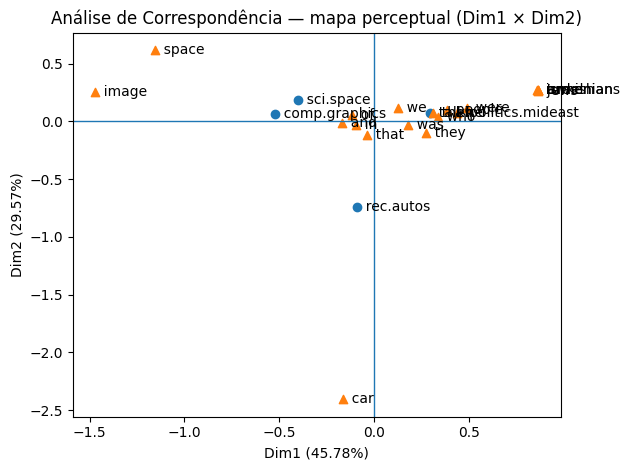

In [ ]:
# %%
# Análise de Correspondência (CA) didática em Python
# - Monta uma tabela de contingência: categoria (linhas) x termo (colunas)
# - Implementa CA "na mão" com SVD (sem libs externas)
# - Imprime passos e resultados
# - Plota o mapa perceptual (primeiros 2 eixos)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_selection import chi2

# ----------------------------
# 1) Dados e Tabela de Contingência
# ----------------------------
# Escolha de 4 categorias para dar mais "dimensão" à CA
categorias = ['sci.space', 'rec.autos', 'talk.politics.mideast', 'comp.graphics']
dados = fetch_20newsgroups(subset='train', categories=categorias, remove=('headers', 'footers', 'quotes'))
textos = dados.data
y = dados.target
nomes_cat = [dados.target_names[i] for i in sorted(set(y))]  # nomes das categorias

print("Categorias selecionadas:", nomes_cat)

# Vetorização BoW (com limite alto para permitir seleção posterior)
vectorizer = CountVectorizer(min_df=5, max_df=0.7)  # filtra termos raros e super comuns
X = vectorizer.fit_transform(textos)
termos = np.array(vectorizer.get_feature_names_out())

# Selecionar termos mais discriminativos via qui-quadrado
# Seleciona, por exemplo, os top 20 termos por qui2
k = 20
chi2_vals, _ = chi2(X, y)
idx_top = np.argsort(chi2_vals)[::-1][:k]
termos_sel = termos[idx_top]

# Reconstroi uma matriz documento-termo apenas com os termos selecionados
X_sel = X[:, idx_top]

# Tabela de contingência categoria x termo (somando contagens por categoria)
df_docs = pd.DataFrame(X_sel.toarray(), columns=termos_sel)
df_docs['categoria'] = [dados.target_names[i] for i in y]
contingencia = df_docs.groupby('categoria')[termos_sel].sum()
contingencia = contingencia.loc[nomes_cat]  # garantir ordem consistente

print("\n=== Tabela de Contingência (categoria × termo) ===")
display(contingencia)

# ----------------------------
# 2) Implementação da CA (conforme teoria)
# ----------------------------

def correspondence_analysis(N: pd.DataFrame):
    """
    Implementa a CA usando:
        P = N / n
        r, c marginais
        S = Dr^{-1/2} (P - r c^T) Dc^{-1/2}
        SVD -> U, Sigma, V
        Coordenadas principais:
            F = Dr^{-1/2} U Sigma
            G = Dc^{-1/2} V Sigma
    Retorna dicionário com resultados e objetos intermediários para análise.
    """
    # Converter para numpy float
    N = N.astype(float)
    n = N.to_numpy().sum()
    P = N / n

    r = P.sum(axis=1).to_numpy()  # (I,)
    c = P.sum(axis=0).to_numpy()  # (J,)

    # Matrizes diagonais (como vetores para inversões eficientes)
    Dr_inv_sqrt = np.diag(1.0 / np.sqrt(r))
    Dc_inv_sqrt = np.diag(1.0 / np.sqrt(c))

    # Matriz centralizada e padronizada
    rcT = np.outer(r, c)
    S = Dr_inv_sqrt @ (P.to_numpy() - rcT) @ Dc_inv_sqrt

    # SVD
    U, Sigma, VT = np.linalg.svd(S, full_matrices=False)
    V = VT.T

    # Autovalores (inércia por eixo)
    lambdas = Sigma**2
    inertia_total = lambdas.sum()  # = chi2/n

    # Coordenadas principais (linhas e colunas)
    F = Dr_inv_sqrt @ U @ np.diag(Sigma)    # (I x K)
    G = Dc_inv_sqrt @ V @ np.diag(Sigma)    # (J x K)

    # Contribuições e cos2 (linhas)
    # contribuição linha i no eixo alpha: CTR_{i,alpha} = (r_i * f_{i,alpha}^2) / lambda_alpha
    # cos2 linha i no eixo alpha: cos2(i,alpha) = f_{i,alpha}^2 / sum_beta f_{i,beta}^2
    # (análogos para colunas)
    eps = 1e-12
    ctr_rows = (r[:, None] * (F**2)) / (lambdas[None, :] + eps)
    ctr_cols = (c[:, None] * (G**2)) / (lambdas[None, :] + eps)

    cos2_rows = (F**2) / (np.sum(F**2, axis=1, keepdims=True) + eps)
    cos2_cols = (G**2) / (np.sum(G**2, axis=1, keepdims=True) + eps)

    return {
        "P": P, "r": r, "c": c,
        "U": U, "Sigma": Sigma, "V": V, "lambdas": lambdas,
        "F": F, "G": G,
        "inertia_total": inertia_total,
        "ctr_rows": ctr_rows, "ctr_cols": ctr_cols,
        "cos2_rows": cos2_rows, "cos2_cols": cos2_cols
    }

res = correspondence_analysis(contingencia)

# ----------------------------
# 3) Impressões didáticas
# ----------------------------
I, J = contingencia.shape
row_labels = contingencia.index.tolist()
col_labels = contingencia.columns.tolist()

print("\n=== Dimensões ===")
print(f"Linhas (categorias): {I}")
print(f"Colunas (termos):    {J}")

print("\n=== Totais e perfis marginais ===")
print("Total de ocorrências n:", int(contingencia.values.sum()))
print("Perfil de linha r (por categoria):")
display(pd.Series(res["r"], index=row_labels, name="r"))
print("Perfil de coluna c (por termo):")
display(pd.Series(res["c"], index=col_labels, name="c"))

print("\n=== Autovalores (inércia por eixo) e inércia explicada ===")
lambdas = res["lambdas"]
inertia_ratio = lambdas / (lambdas.sum() + 1e-12)
df_eigs = pd.DataFrame({
    "lambda": lambdas,
    "explicada_%": 100 * inertia_ratio,
    "explicada_acum_%": 100 * np.cumsum(inertia_ratio)
})
display(df_eigs.head(10))

print("Inércia total (chi2/n):", res["inertia_total"])

# Coordenadas principais (primeiros 2 eixos)
k_plot = 2
F = res["F"][:, :k_plot]
G = res["G"][:, :k_plot]
df_F = pd.DataFrame(F, index=row_labels, columns=[f"Dim{d+1}" for d in range(k_plot)])
df_G = pd.DataFrame(G, index=col_labels, columns=[f"Dim{d+1}" for d in range(k_plot)])

print("\n=== Coordenadas principais (linhas / categorias) — 2 primeiras dimensões ===")
display(df_F.round(4))

print("\n=== Coordenadas principais (colunas / termos) — 2 primeiras dimensões ===")
display(df_G.round(4))

# Contribuições e cos2 (qualidade de representação) — mostramos top itens por Dim1/Dim2
ctr_rows = pd.DataFrame(res["ctr_rows"][:, :k_plot], index=row_labels, columns=[f"CTR_Dim{d+1}" for d in range(k_plot)])
ctr_cols = pd.DataFrame(res["ctr_cols"][:, :k_plot], index=col_labels, columns=[f"CTR_Dim{d+1}" for d in range(k_plot)])
cos2_rows = pd.DataFrame(res["cos2_rows"][:, :k_plot], index=row_labels, columns=[f"cos2_Dim{d+1}" for d in range(k_plot)])
cos2_cols = pd.DataFrame(res["cos2_cols"][:, :k_plot], index=col_labels, columns=[f"cos2_Dim{d+1}" for d in range(k_plot)])

print("\n=== Contribuições das linhas (categorias) nas Dim1 e Dim2 ===")
display(ctr_rows.round(4).sort_values("CTR_Dim1", ascending=False))

print("\n=== Contribuições das colunas (termos) nas Dim1 e Dim2 ===")
display(ctr_cols.round(4).sort_values("CTR_Dim1", ascending=False).head(15))

print("\n=== cos² das linhas (qualidade de representação) nas Dim1 e Dim2 ===")
display(cos2_rows.round(4))

print("\n=== cos² das colunas (qualidade de representação) nas Dim1 e Dim2 ===")
display(cos2_cols.round(4).sort_values("cos2_Dim1", ascending=False).head(15))

# ----------------------------
# 4) Mapa perceptual (biplot simples)
# ----------------------------
plt.figure()
plt.axhline(0, linewidth=1)
plt.axvline(0, linewidth=1)

# plotar categorias (linhas)
plt.scatter(F[:,0], F[:,1], marker='o')
for i, label in enumerate(row_labels):
    plt.text(F[i,0], F[i,1], "  " + label, va='center')

# plotar termos (colunas)
plt.scatter(G[:,0], G[:,1], marker='^')
for j, label in enumerate(col_labels):
    plt.text(G[j,0], G[j,1], "  " + label, va='center')

plt.title("Análise de Correspondência — mapa perceptual (Dim1 × Dim2)")
plt.xlabel(f"Dim1 ({df_eigs.loc[0, 'explicada_%']:.2f}%)")
plt.ylabel(f"Dim2 ({df_eigs.loc[1, 'explicada_%']:.2f}%)")
plt.tight_layout()
plt.show()


Interpretação

- **Pontos próximos** tendem a estar **associados** acima do esperado ao acaso.
- **Categorias (círculos)** e **termos (triângulos)** que se aproximam sugerem relação de perfil: a categoria usa relativamente mais aquele termo.
- **Distância da origem** indica contribuição à **inércia**: quanto mais distante, mais aquela categoria/termo explica a variação dos perfis.
- Para justificar a leitura de um eixo, observe:
  - **Contribuições** (CTR) mais altas nesse eixo.
  - **Qualidade de representação** (**cos²**) alta nas dimensões representadas.




---



## 4. Análise de Correspondência Múltipla (MCA)

A **Análise de Correspondência Múltipla** é uma extensão da Análise de Correspondência (CA) para mais de duas variáveis categóricas.  
É especialmente útil quando temos um conjunto de variáveis qualitativas, como respostas de um questionário ou atributos categóricos de indivíduos.

### 4.1 Estrutura dos dados

Considere um conjunto de $Q$ variáveis categóricas observadas em $n$ indivíduos.  
Cada variável $q$ possui $K_q$ categorias. A **matriz indicadora completa** $Z$ tem dimensão $n \times K$, onde $K = \sum_{q=1}^{Q} K_q$, e cada linha contém exatamente uma indicação 1 para cada variável (ou seja, um vetor disjunto de 0/1 por variável).

Exemplo de $Z$ para duas variáveis:

| Indivíduo | Sexo_M | Sexo_F | Opinião_Pos | Opinião_Neg | Opinião_Neutro |
|----------|--------|--------|-------------|-------------|----------------|
| 1 | 1 | 0 | 1 | 0 | 0 |
| 2 | 0 | 1 | 0 | 1 | 0 |
| 3 | 0 | 1 | 0 | 0 | 1 |

### 4.2 Matriz Burt

Alternativamente, podemos trabalhar com a **matriz de Burt**, definida como:

$$
B = \frac{1}{n} Z^{\top} Z,
$$

que é uma matriz simétrica $K \times K$ contendo todas as tabelas de contingência cruzando pares de variáveis categóricas.

### 4.3 Algoritmo da MCA

A MCA pode ser vista como uma CA aplicada à matriz $Z$ ou $B$, com ponderação especial para equilibrar o efeito das variáveis. O procedimento é:

1. **Construção da matriz indicadora $Z$** e cálculo de perfis marginais.  
2. **Centralização e padronização** com base nas frequências marginais das categorias.  
3. **Decomposição em valores singulares (SVD)** da matriz padronizada.  
4. **Cálculo das coordenadas principais** dos indivíduos e das categorias nos eixos fatoriais.

As coordenadas fatoriais dos indivíduos são obtidas como médias baricêntricas das coordenadas das categorias que selecionaram, e vice versa.

### 4.4 Interpretação

O **mapa fatorial** da MCA projeta simultaneamente indivíduos e categorias no mesmo espaço.  
Algumas interpretações importantes:

- **Proximidade entre categorias**: indica que são escolhidas juntas por um número elevado de indivíduos.  
- **Proximidade entre indivíduos**: indica perfis semelhantes de respostas.  
- **Posição de uma categoria em relação ao centro**: categorias raras tendem a ficar mais distantes, pois diferenciam mais o perfil.

A **inércia total** é relacionada ao qui quadrado da matriz de Burt e a variância explicada por cada dimensão indica a qualidade da representação.

### 4.5 Relação com PCA

A MCA é análoga ao **PCA aplicado a variáveis qualitativas codificadas como dummies**.  
Enquanto o PCA trabalha com variância e covariância de variáveis quantitativas, a MCA trabalha com frequências relativas e distâncias do qui quadrado.

### 4.6 Boas Práticas

- **Equilibrar variáveis**: cada variável deve ter peso igual na análise, independentemente do número de categorias.  
- **Tratar categorias raras**: categorias com baixíssima frequência podem distorcer os eixos; podem ser agrupadas.  
- **Interpretar eixos fatoriais**: dar significado às dimensões com base nas categorias que mais contribuem.  
- **Projetar variáveis suplementares**: perguntas adicionais podem ser projetadas no mapa sem influenciar a construção dos eixos.

### 4.7 Aplicações

- **Pesquisas de opinião:** analisar perfis de respondentes e como se agrupam em torno de certas respostas.  
- **Marketing:** segmentação de clientes por atributos demográficos e preferências.  
- **Ciências sociais:** caracterização de indivíduos em surveys com múltiplas variáveis qualitativas.


=== Amostra do dataset categórico ===


,Genero,Escolaridade,Satisfacao,Dispositivo
0,F,Superior,Alta,Android
1,M,Superior,Alta,Android
2,F,Médio,Alta,Android
3,F,Fundamental,Média,iOS
4,M,Fundamental,Média,iOS



=== Matriz indicadora Z (head) ===


,Genero_F,Genero_M,Escolaridade_Fundamental,Escolaridade_Médio,Escolaridade_Superior,Satisfacao_Alta,Satisfacao_Baixa,Satisfacao_Média,Dispositivo_Android,Dispositivo_Outro,Dispositivo_iOS
0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
1,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
2,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


Dimensões de Z: n=250 indivíduos, K=11 categorias (todas as variáveis)

=== Massas de coluna (frequências das categorias) ===


,c
Genero_M,0.536
Dispositivo_Android,0.528
Genero_F,0.464
Satisfacao_Média,0.412
Escolaridade_Superior,0.400
Dispositivo_iOS,0.380
Satisfacao_Alta,0.336
Escolaridade_Médio,0.328
Escolaridade_Fundamental,0.272
Satisfacao_Baixa,0.252



=== Autovalores (inércia por eixo) e % explicada ===


,lambda,explicada_%,explicada_acum_%
0,1.268745e+00,1.812493e+01,18.124931
1,1.197792e+00,1.711132e+01,35.236251
2,1.086203e+00,1.551718e+01,50.753433
3,1.063358e+00,1.519082e+01,65.944257
4,8.870544e-01,1.267221e+01,78.616462
5,8.473495e-01,1.210499e+01,90.721454
6,6.494982e-01,9.278546e+00,100.000000
7,1.699131e-31,2.427330e-30,100.000000
8,9.728198e-32,1.389743e-30,100.000000
9,6.596662e-32,9.423802e-31,100.000000


Inércia total: 6.999999999999999

=== Coordenadas principais das CATEGORIAS (2 dims) ===


,Dim1,Dim2
Genero_F,-0.7080,0.3039
Genero_M,0.6129,-0.2631
Escolaridade_Fundamental,-0.0297,0.1145
Escolaridade_Médio,0.8350,-0.5247
Escolaridade_Superior,-0.6645,0.3523
Satisfacao_Alta,-0.5834,-0.8072
Satisfacao_Baixa,0.3259,0.9780
Satisfacao_Média,0.2765,0.0601
Dispositivo_Android,0.4789,0.3280
Dispositivo_Outro,-0.5517,-2.2203



=== Top categorias por contribuição na Dim1 ===


,CTR_Dim1,CTR_Dim2
Genero_F,0.1833,0.0358
Escolaridade_Médio,0.1802,0.0754
Genero_M,0.1587,0.0310
Escolaridade_Superior,0.1392,0.0415
Dispositivo_Android,0.0955,0.0474
Satisfacao_Alta,0.0901,0.1828
Dispositivo_iOS,0.0847,0.0021
Satisfacao_Média,0.0248,0.0012
Dispositivo_Outro,0.0221,0.3787
Satisfacao_Baixa,0.0211,0.2012



=== Top categorias por contribuição na Dim2 ===


,CTR_Dim1,CTR_Dim2
Dispositivo_Outro,0.0221,0.3787
Satisfacao_Baixa,0.0211,0.2012
Satisfacao_Alta,0.0901,0.1828
Escolaridade_Médio,0.1802,0.0754
Dispositivo_Android,0.0955,0.0474
Escolaridade_Superior,0.1392,0.0415
Genero_F,0.1833,0.0358
Genero_M,0.1587,0.0310
Escolaridade_Fundamental,0.0002,0.0030
Dispositivo_iOS,0.0847,0.0021


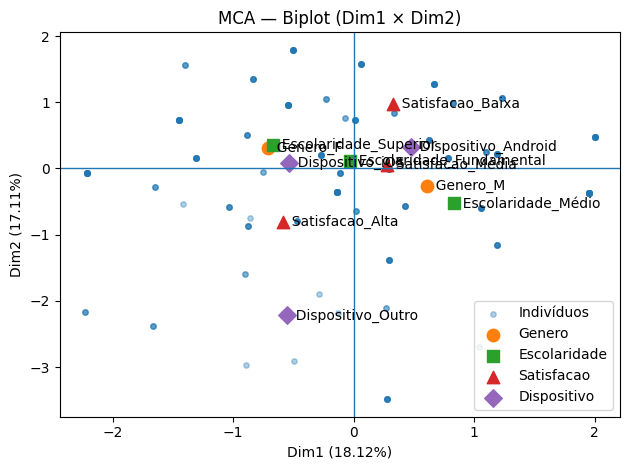

In [ ]:
# %%
# MCA (Análise de Correspondência Múltipla) – Exemplo Didático Completo
# - Simula um survey com variáveis categóricas
# - Constrói a matriz indicadora Z
# - Implementa MCA via SVD (conforme teoria)
# - Imprime resultados interpretáveis
# - Plota biplot (indivíduos + categorias) nas 2 primeiras dimensões

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
rng = np.random.default_rng(42)

# ----------------------------
# 1) SIMULAÇÃO DE DADOS CATEGÓRICOS
# ----------------------------
n = 250  # número de indivíduos

# Variáveis e categorias
genero_vals = ["M", "F"]
escolaridade_vals = ["Fundamental", "Médio", "Superior"]
satisfacao_vals = ["Baixa", "Média", "Alta"]
dispositivo_vals = ["Android", "iOS", "Outro"]

# Gerar com alguma estrutura (dependências fracas para dar "forma" aos eixos)
genero = rng.choice(genero_vals, size=n, p=[0.55, 0.45])

# escolaridade tende a "Superior" para F um pouco mais que M (sutil)
p_sup = np.where(genero == "F", 0.45, 0.35)
escolaridade = []
for ps in p_sup:
    r = rng.random()
    if r < 0.25: escolaridade.append("Fundamental")
    elif r < 0.25 + (1-0.25-ps): escolaridade.append("Médio")
    else: escolaridade.append("Superior")
escolaridade = np.array(escolaridade)

# satisfação correlaciona algo com escolaridade (sup ~ mais "Alta")
satisfacao = []
for esc in escolaridade:
    if esc == "Superior":
        probs = [0.15, 0.35, 0.50]  # Baixa, Média, Alta
    elif esc == "Médio":
        probs = [0.25, 0.45, 0.30]
    else:
        probs = [0.35, 0.45, 0.20]
    satisfacao.append(rng.choice(satisfacao_vals, p=probs))
satisfacao = np.array(satisfacao)

# dispositivo um pouco mais iOS em F e Android em M
dispositivo = np.where(
    genero == "F",
    rng.choice(dispositivo_vals, size=n, p=[0.45, 0.45, 0.10]),
    rng.choice(dispositivo_vals, size=n, p=[0.60, 0.30, 0.10])
)

df = pd.DataFrame({
    "Genero": genero,
    "Escolaridade": escolaridade,
    "Satisfacao": satisfacao,
    "Dispositivo": dispositivo
})

print("=== Amostra do dataset categórico ===")
display(df.head())

# ----------------------------
# 2) MATRIZ INDICADORA COMPLETA Z
# ----------------------------
# get_dummies por variável separadamente para manter blocos (sem drop_first)
dummies = []
var_blocks = {}  # mapeia variável -> cols no Z
start = 0

for var in ["Genero", "Escolaridade", "Satisfacao", "Dispositivo"]:
    D = pd.get_dummies(df[var], prefix=var, drop_first=False)
    cols = list(D.columns)
    dummies.append(D)
    var_blocks[var] = list(range(start, start + D.shape[1]))
    start += D.shape[1]

Z = pd.concat(dummies, axis=1).astype(float)  # n x K
Z_cols = list(Z.columns)
n, K = Z.shape

print("\n=== Matriz indicadora Z (head) ===")
display(Z.head())
print(f"Dimensões de Z: n={n} indivíduos, K={K} categorias (todas as variáveis)")

# ----------------------------
# 3) IMPLEMENTAÇÃO DA MCA (conforme teoria)
# ----------------------------
def mca_from_indicator(Z: pd.DataFrame):
    """
    MCA clássica a partir da matriz indicadora completa Z (n x K):
      - P = Z / n
      - massas de linha r_i = 1/n (uniforme), massas de coluna c_j = colsum(Z)/n
      - S = Dr^{-1/2} (P - r c^T) Dc^{-1/2}
      - SVD -> U, Sigma, V
      - Coordenadas principais:
            F = Dr^{-1/2} U Sigma   (indivíduos)
            G = Dc^{-1/2} V Sigma   (categorias)
    Retorna dicionário com objetos-chave para análise.
    """
    Z = Z.astype(float)
    n, K = Z.shape
    P = Z / n

    r = np.full(n, 1.0 / n)                 # massas de linha (uniformes)
    c = P.sum(axis=0).to_numpy()            # massas de coluna (freqs das categorias)

    # Dr^{-1/2} e Dc^{-1/2}
    Dr_inv_sqrt = np.diag(1.0 / np.sqrt(r))  # = sqrt(n) * I
    Dc_inv_sqrt = np.diag(1.0 / np.sqrt(c))

    # Centralização/Padronização
    rcT = np.outer(r, c)
    S = Dr_inv_sqrt @ (P.to_numpy() - rcT) @ Dc_inv_sqrt

    # SVD
    U, Sigma, VT = np.linalg.svd(S, full_matrices=False)
    V = VT.T

    lambdas = Sigma**2
    inertia_total = lambdas.sum()  # proporcional ao qui2/n da matriz de Burt

    # Coordenadas principais
    F = Dr_inv_sqrt @ U @ np.diag(Sigma)   # indivíduos (n x K)
    G = Dc_inv_sqrt @ V @ np.diag(Sigma)   # categorias (K x K)

    # Contribuições e cos2
    eps = 1e-12
    ctr_rows = (r[:, None] * (F**2)) / (lambdas[None, :] + eps)
    ctr_cols = (c[:, None] * (G**2)) / (lambdas[None, :] + eps)

    cos2_rows = (F**2) / (np.sum(F**2, axis=1, keepdims=True) + eps)
    cos2_cols = (G**2) / (np.sum(G**2, axis=1, keepdims=True) + eps)

    return {
        "r": r, "c": c, "U": U, "Sigma": Sigma, "V": V,
        "lambdas": lambdas, "inertia_total": inertia_total,
        "F": F, "G": G,
        "ctr_rows": ctr_rows, "ctr_cols": ctr_cols,
        "cos2_rows": cos2_rows, "cos2_cols": cos2_cols
    }

res = mca_from_indicator(Z)

# ----------------------------
# 4) IMPRESSÕES DIDÁTICAS
# ----------------------------
print("\n=== Massas de coluna (frequências das categorias) ===")
c_series = pd.Series(res["c"], index=Z_cols, name="c")
display(c_series.sort_values(ascending=False))

print("\n=== Autovalores (inércia por eixo) e % explicada ===")
lambdas = res["lambdas"]
ratio = lambdas / (lambdas.sum() + 1e-12)
df_eigs = pd.DataFrame({
    "lambda": lambdas,
    "explicada_%": 100 * ratio,
    "explicada_acum_%": 100 * np.cumsum(ratio)
})
display(df_eigs.head(10))

print("Inércia total:", res["inertia_total"])

# Coordenadas principais (2 primeiras dimensões)
k_plot = 2
F = res["F"][:, :k_plot]  # indivíduos
G = res["G"][:, :k_plot]  # categorias
df_F = pd.DataFrame(F, columns=[f"Dim{d+1}" for d in range(k_plot)])
df_G = pd.DataFrame(G, index=Z_cols, columns=[f"Dim{d+1}" for d in range(k_plot)])

print("\n=== Coordenadas principais das CATEGORIAS (2 dims) ===")
display(df_G.round(4))

# Contribuições (categorias) – quem mais explica Dim1 / Dim2
ctr_cols = pd.DataFrame(res["ctr_cols"][:, :k_plot], index=Z_cols, columns=[f"CTR_Dim{d+1}" for d in range(k_plot)])
print("\n=== Top categorias por contribuição na Dim1 ===")
display(ctr_cols.sort_values("CTR_Dim1", ascending=False).head(10).round(4))
print("\n=== Top categorias por contribuição na Dim2 ===")
display(ctr_cols.sort_values("CTR_Dim2", ascending=False).head(10).round(4))

# ----------------------------
# 5) BIPLOT (Indivíduos + Categorias)
# ----------------------------
plt.figure()
plt.axhline(0, linewidth=1)
plt.axvline(0, linewidth=1)

# Indivíduos: pontos cinza claro
plt.scatter(F[:,0], F[:,1], alpha=0.35, s=15, label="Indivíduos")

# Categorias: marcadores por bloco de variável
markers = {
    "Genero": "o",
    "Escolaridade": "s",
    "Satisfacao": "^",
    "Dispositivo": "D"
}
for var, idxs in var_blocks.items():
    coords = G[idxs, :]
    plt.scatter(coords[:,0], coords[:,1], marker=markers[var], s=80, label=var)
    # rótulos
    for j, col_idx in enumerate(idxs):
        plt.text(coords[j,0], coords[j,1], "  " + Z_cols[col_idx], va='center')

plt.title("MCA — Biplot (Dim1 × Dim2)")
plt.xlabel(f"Dim1 ({df_eigs.loc[0, 'explicada_%']:.2f}%)")
plt.ylabel(f"Dim2 ({df_eigs.loc[1, 'explicada_%']:.2f}%)")
plt.legend(loc="best", frameon=True)
plt.tight_layout()
plt.show()


### Interpretação rápida (coloque após o gráfico)

- **Categorias próximas** tendem a ser **coescolhidas** pelos mesmos indivíduos.
- **Indivíduos** próximos compartilham **perfis semelhantes** (escolheram categorias parecidas).
- Para interpretar os **eixos**:
  - observe quais categorias têm **maior contribuição (CTR)** em cada dimensão;
  - verifique **cos²** (qualidade de representação) para saber quem está bem projetado no plano.
- Categorias **raras** tendem a aparecer mais distantes da origem, pois diferenciam perfis.
- Lembre: MCA é **descritiva**; associações não implicam causalidade.




---



## 5. Coocorrência de Categorias

A **análise de coocorrência** busca identificar **quais categorias aparecem juntas** em um mesmo contexto (documento, entrevista, resposta).  
É uma técnica exploratória que complementa a CA e a MCA, permitindo descobrir associações entre códigos, temas ou termos.

### 5.1 Construção da Matriz de Coocorrência

Dada uma matriz indicadora $Z$ de dimensão $n \times K$ (indivíduos × categorias), a matriz de coocorrência $C$ é obtida por:

$$
C = Z^{\top} Z,
$$

onde cada elemento $c_{ij}$ indica o número de indivíduos (ou documentos) em que as categorias $i$ e $j$ ocorrem simultaneamente.

- Os elementos da diagonal $c_{ii}$ indicam o total de ocorrências da categoria $i$.
- Para análise de **coocorrência binária**, basta converter $Z$ para 0/1 antes de multiplicar.
- Para textos, $Z$ pode ser uma matriz documento-termo (BoW ou TF-IDF), de modo que $C$ se torna uma matriz termo-termo.

### 5.2 Medidas de Associação

A matriz $C$ contém contagens brutas. Para interpretar relações, é comum normalizar:

- **Coeficiente de Jaccard**  
  Mede o grau de coocorrência em relação à união de ocorrências:

  $$
  J(i,j) = \frac{c_{ij}}{c_{ii} + c_{jj} - c_{ij}}
  $$

  Varia de 0 (nunca coocorrem) a 1 (sempre coocorrem).

- **Similaridade Cosseno**  
  Mede a proximidade de vetores de ocorrência das categorias $i$ e $j$:

  $$
  \cos(i,j) = \frac{c_{ij}}{\sqrt{c_{ii} \, c_{jj}}}
  $$

  Varia de 0 (nenhuma relação) a 1 (ocorrem sempre juntas).

- **PMI (Pointwise Mutual Information)**  
  Mede a informação mútua entre duas categorias:

  $$
  PMI(i,j) = \log \frac{p(i,j)}{p(i)p(j)},
  $$

  onde $p(i,j)$ é a probabilidade de coocorrência e $p(i), p(j)$ são probabilidades marginais.

### 5.3 Visualização

A matriz de coocorrência pode ser visualizada de diversas formas:

- **Mapa de calor** (*heatmap*) mostrando intensidade de coocorrência.  
- **Grafo de coocorrência**, onde:
  - Nós representam categorias.
  - Arestas representam coocorrência acima de um limiar.
  - Espessura da aresta é proporcional à força da associação.

### 5.4 Interpretação

- Categorias com alta coocorrência sugerem **temas relacionados** ou **padrões de resposta comuns**.
- A presença de **clusters** na rede pode indicar **subtemas** ou perfis de respondentes.
- Coocorrência alta não implica causalidade — apenas que aparecem juntas com frequência.

### 5.5 Boas Práticas

- **Filtrar categorias raras** para evitar inflar relações artificiais.  
- **Normalizar a matriz** para tornar comparações entre categorias justas.  
- **Escolher limiar de exibição** (para grafos) para evitar poluição visual.  
- Sempre **interpretar no contexto**: coocorrência forte pode ocorrer por redundância ou por correlação temática real.


Usando Z da célula anterior (MCA).

=== Matriz indicadora Z (head) ===


,Genero_F,Genero_M,Escolaridade_Fundamental,Escolaridade_Médio,Escolaridade_Superior,Satisfacao_Alta,Satisfacao_Baixa,Satisfacao_Média,Dispositivo_Android,Dispositivo_Outro,Dispositivo_iOS
0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
1,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
2,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


Dimensões de Z: 250 indivíduos × 11 categorias

=== Matriz de coocorrência C = Z^T Z (head) ===


,Genero_F,Genero_M,Escolaridade_Fundamental,Escolaridade_Médio,Escolaridade_Superior,Satisfacao_Alta,Satisfacao_Baixa,Satisfacao_Média,Dispositivo_Android,Dispositivo_Outro
Genero_F,116.0,0.0,33.0,27.0,56.0,38.0,31.0,47.0,54.0,12.0
Genero_M,0.0,134.0,35.0,55.0,44.0,46.0,32.0,56.0,78.0,11.0
Escolaridade_Fundamental,33.0,35.0,68.0,0.0,0.0,18.0,21.0,29.0,33.0,9.0
Escolaridade_Médio,27.0,55.0,0.0,82.0,0.0,25.0,19.0,38.0,45.0,9.0
Escolaridade_Superior,56.0,44.0,0.0,0.0,100.0,41.0,23.0,36.0,54.0,5.0
Satisfacao_Alta,38.0,46.0,18.0,25.0,41.0,84.0,0.0,0.0,37.0,14.0
Satisfacao_Baixa,31.0,32.0,21.0,19.0,23.0,0.0,63.0,0.0,41.0,2.0
Satisfacao_Média,47.0,56.0,29.0,38.0,36.0,0.0,0.0,103.0,54.0,7.0
Dispositivo_Android,54.0,78.0,33.0,45.0,54.0,37.0,41.0,54.0,132.0,0.0
Dispositivo_Outro,12.0,11.0,9.0,9.0,5.0,14.0,2.0,7.0,0.0,23.0



=== Similaridade Cosseno (head) ===


,Genero_F,Genero_M,Escolaridade_Fundamental,Escolaridade_Médio,Escolaridade_Superior,Satisfacao_Alta,Satisfacao_Baixa,Satisfacao_Média,Dispositivo_Android,Dispositivo_Outro
Genero_F,1.000,0.000,0.372,0.277,0.520,0.385,0.363,0.430,0.436,0.232
Genero_M,0.000,1.000,0.367,0.525,0.380,0.434,0.348,0.477,0.586,0.198
Escolaridade_Fundamental,0.372,0.367,1.000,0.000,0.000,0.238,0.321,0.347,0.348,0.228
Escolaridade_Médio,0.277,0.525,0.000,1.000,0.000,0.301,0.264,0.413,0.433,0.207
Escolaridade_Superior,0.520,0.380,0.000,0.000,1.000,0.447,0.290,0.355,0.470,0.104
Satisfacao_Alta,0.385,0.434,0.238,0.301,0.447,1.000,0.000,0.000,0.351,0.319
Satisfacao_Baixa,0.363,0.348,0.321,0.264,0.290,0.000,1.000,0.000,0.450,0.053
Satisfacao_Média,0.430,0.477,0.347,0.413,0.355,0.000,0.000,1.000,0.463,0.144
Dispositivo_Android,0.436,0.586,0.348,0.433,0.470,0.351,0.450,0.463,1.000,0.000
Dispositivo_Outro,0.232,0.198,0.228,0.207,0.104,0.319,0.053,0.144,0.000,1.000



=== Jaccard (head) ===


,Genero_F,Genero_M,Escolaridade_Fundamental,Escolaridade_Médio,Escolaridade_Superior,Satisfacao_Alta,Satisfacao_Baixa,Satisfacao_Média,Dispositivo_Android,Dispositivo_Outro
Genero_F,1.000,0.000,0.219,0.158,0.350,0.235,0.209,0.273,0.278,0.094
Genero_M,0.000,1.000,0.210,0.342,0.232,0.267,0.194,0.309,0.415,0.075
Escolaridade_Fundamental,0.219,0.210,1.000,0.000,0.000,0.134,0.191,0.204,0.198,0.110
Escolaridade_Médio,0.158,0.342,0.000,1.000,0.000,0.177,0.151,0.259,0.266,0.094
Escolaridade_Superior,0.350,0.232,0.000,0.000,1.000,0.287,0.164,0.216,0.303,0.042
Satisfacao_Alta,0.235,0.267,0.134,0.177,0.287,1.000,0.000,0.000,0.207,0.151
Satisfacao_Baixa,0.209,0.194,0.191,0.151,0.164,0.000,1.000,0.000,0.266,0.024
Satisfacao_Média,0.273,0.309,0.204,0.259,0.216,0.000,0.000,1.000,0.298,0.059
Dispositivo_Android,0.278,0.415,0.198,0.266,0.303,0.207,0.266,0.298,1.000,0.000
Dispositivo_Outro,0.094,0.075,0.110,0.094,0.042,0.151,0.024,0.059,0.000,1.000



=== PMI (head) ===


,Genero_F,Genero_M,Escolaridade_Fundamental,Escolaridade_Médio,Escolaridade_Superior,Satisfacao_Alta,Satisfacao_Baixa,Satisfacao_Média,Dispositivo_Android,Dispositivo_Outro
Genero_F,0.768,-26.240,0.045,-0.343,0.188,-0.025,0.059,-0.017,-0.126,0.117
Genero_M,-26.240,0.624,-0.041,0.224,-0.197,0.021,-0.054,0.014,0.098,-0.114
Escolaridade_Fundamental,0.045,-0.041,1.302,-25.214,-25.413,-0.238,0.203,0.035,-0.084,0.364
Escolaridade_Médio,-0.343,0.224,-25.214,1.115,-25.600,-0.097,-0.084,0.118,0.039,0.176
Escolaridade_Superior,0.188,-0.197,-25.413,-25.600,0.916,0.199,-0.091,-0.135,0.022,-0.610
Satisfacao_Alta,-0.025,0.021,-0.238,-0.097,0.199,1.091,-25.162,-25.654,-0.181,0.594
Satisfacao_Baixa,0.059,-0.054,0.203,-0.084,-0.091,-25.162,1.378,-25.366,0.209,-1.064
Satisfacao_Média,-0.017,0.014,0.035,0.118,-0.135,-25.654,-25.366,0.887,-0.007,-0.303
Dispositivo_Android,-0.126,0.098,-0.084,0.039,0.022,-0.181,0.209,-0.007,0.639,-24.606
Dispositivo_Outro,0.117,-0.114,0.364,0.176,-0.610,0.594,-1.064,-0.303,-24.606,2.386



=== Top pares por COSINE (com coocorrência mínima) ===


,cat_i,cat_j,score,cooc_count
0,Genero_M,Dispositivo_Android,0.586,78.0
1,Genero_M,Escolaridade_Médio,0.525,55.0
2,Genero_F,Escolaridade_Superior,0.520,56.0
3,Genero_M,Satisfacao_Média,0.477,56.0
4,Genero_F,Dispositivo_iOS,0.476,50.0
5,Escolaridade_Superior,Dispositivo_Android,0.470,54.0
6,Satisfacao_Média,Dispositivo_Android,0.463,54.0
7,Satisfacao_Baixa,Dispositivo_Android,0.450,41.0
8,Escolaridade_Superior,Satisfacao_Alta,0.447,41.0
9,Genero_F,Dispositivo_Android,0.436,54.0



=== Top pares por JACCARD (com coocorrência mínima) ===


,cat_i,cat_j,score,cooc_count
0,Genero_M,Dispositivo_Android,0.415,78.0
1,Genero_F,Escolaridade_Superior,0.350,56.0
2,Genero_M,Escolaridade_Médio,0.342,55.0
3,Genero_F,Dispositivo_iOS,0.311,50.0
4,Genero_M,Satisfacao_Média,0.309,56.0
5,Escolaridade_Superior,Dispositivo_Android,0.303,54.0
6,Satisfacao_Média,Dispositivo_Android,0.298,54.0
7,Escolaridade_Superior,Satisfacao_Alta,0.287,41.0
8,Genero_F,Dispositivo_Android,0.278,54.0
9,Genero_F,Satisfacao_Média,0.273,47.0



=== Top pares por PMI (com coocorrência mínima) ===


,cat_i,cat_j,score,cooc_count
0,Satisfacao_Alta,Dispositivo_Outro,0.594,14.0
1,Escolaridade_Fundamental,Dispositivo_Outro,0.364,9.0
2,Genero_M,Escolaridade_Médio,0.224,55.0
3,Satisfacao_Baixa,Dispositivo_Android,0.209,41.0
4,Escolaridade_Fundamental,Satisfacao_Baixa,0.203,21.0
5,Escolaridade_Superior,Satisfacao_Alta,0.199,41.0
6,Genero_F,Escolaridade_Superior,0.188,56.0
7,Escolaridade_Médio,Dispositivo_Outro,0.176,9.0
8,Genero_F,Dispositivo_iOS,0.126,50.0
9,Escolaridade_Médio,Satisfacao_Média,0.118,38.0


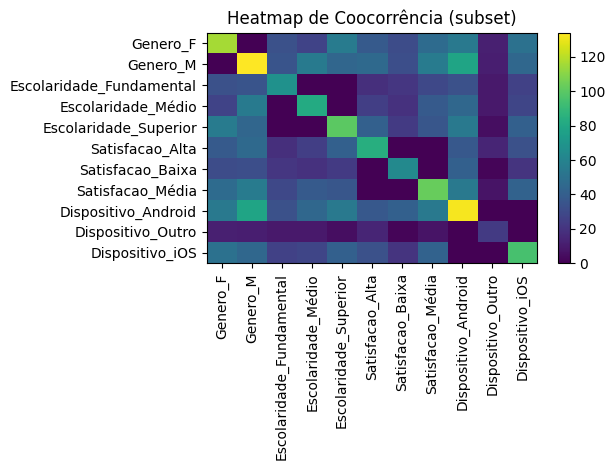

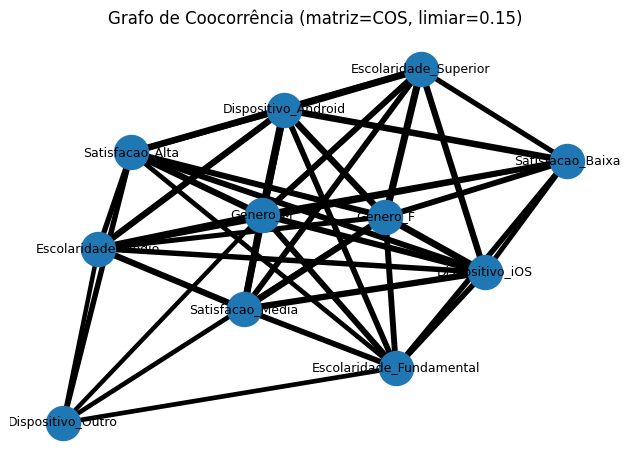

In [ ]:
# %%
# Coocorrência de Categorias a partir de Z (matriz indicadora)
# - Reaproveita Z (se já existir) ou cria um dataset categórico e monta Z
# - Calcula C = Z^T Z (coocorrência), Jaccard, Cosine e PMI
# - Imprime tabelas e top pares
# - Plota heatmap e grafo de coocorrência (com limiar)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 0) Garantir Z (reaproveita da célula de MCA; se não houver, cria Z aqui)
try:
    _ = Z
    Z_used = Z.copy()
    Z_cols_used = list(Z_used.columns)
    print("Usando Z da célula anterior (MCA).")
except NameError:
    print("Z não encontrado. Gerando dataset categórico simples para demonstração.")
    rng = np.random.default_rng(123)
    n = 180
    genero_vals = ["M", "F"]
    escolaridade_vals = ["Fundamental", "Médio", "Superior"]
    satisfacao_vals = ["Baixa", "Média", "Alta"]
    dispositivo_vals = ["Android", "iOS", "Outro"]

    genero = rng.choice(genero_vals, size=n, p=[0.55, 0.45])
    escolaridade = rng.choice(escolaridade_vals, size=n, p=[0.25, 0.45, 0.30])
    satisfacao = rng.choice(satisfacao_vals, size=n, p=[0.25, 0.45, 0.30])
    dispositivo = np.where(
        genero == "F",
        rng.choice(dispositivo_vals, size=n, p=[0.45, 0.45, 0.10]),
        rng.choice(dispositivo_vals, size=n, p=[0.60, 0.30, 0.10])
    )

    df_demo = pd.DataFrame({
        "Genero": genero,
        "Escolaridade": escolaridade,
        "Satisfacao": satisfacao,
        "Dispositivo": dispositivo
    })

    # one-hot por variável para manter blocos inteiros
    dummies = [
        pd.get_dummies(df_demo["Genero"], prefix="Genero", drop_first=False),
        pd.get_dummies(df_demo["Escolaridade"], prefix="Escolaridade", drop_first=False),
        pd.get_dummies(df_demo["Satisfacao"], prefix="Satisfacao", drop_first=False),
        pd.get_dummies(df_demo["Dispositivo"], prefix="Dispositivo", drop_first=False),
    ]
    Z_used = pd.concat(dummies, axis=1).astype(float)
    Z_cols_used = list(Z_used.columns)

print("\n=== Matriz indicadora Z (head) ===")
display(Z_used.head())
print(f"Dimensões de Z: {Z_used.shape[0]} indivíduos × {Z_used.shape[1]} categorias")

# 1) Matriz de coocorrência bruta: C = Z^T Z
Z_bin = (Z_used > 0).astype(float)  # binariza por segurança
C = Z_bin.T @ Z_bin
C = C.astype(float)
C.index = Z_cols_used
C.columns = Z_cols_used

print("\n=== Matriz de coocorrência C = Z^T Z (head) ===")
display(C.iloc[:10, :10])

# 2) Medidas de associação
diag = np.diag(C)  # c_ii
diag = diag.astype(float)

# Cosine: cos(i,j) = c_ij / sqrt(c_ii * c_jj)
outer_sqrt = np.sqrt(np.outer(diag, diag)) + 1e-12
COS = C.to_numpy() / outer_sqrt
COS = pd.DataFrame(COS, index=Z_cols_used, columns=Z_cols_used)

# Jaccard: J(i,j) = c_ij / (c_ii + c_jj - c_ij)
den_jacc = (np.add.outer(diag, diag) - C.to_numpy()) + 1e-12
JACC = C.to_numpy() / den_jacc
JACC = pd.DataFrame(JACC, index=Z_cols_used, columns=Z_cols_used)

# PMI: log( p(i,j) / (p(i)p(j)) ), com p(i) = c_ii / n, p(i,j) = c_ij / n
n_ind = Z_used.shape[0]
p_i = diag / n_ind
p_ij = C.to_numpy() / n_ind
den_pmi = (np.outer(p_i, p_i)) + 1e-12
PMI = np.log((p_ij + 1e-12) / den_pmi)
PMI = pd.DataFrame(PMI, index=Z_cols_used, columns=Z_cols_used)

print("\n=== Similaridade Cosseno (head) ===")
display(COS.iloc[:10, :10].round(3))
print("\n=== Jaccard (head) ===")
display(JACC.iloc[:10, :10].round(3))
print("\n=== PMI (head) ===")
display(PMI.iloc[:10, :10].round(3))

# 3) Top pares por medida (off-diagonal)
def top_pairs_from_matrix(M: pd.DataFrame, k=10, min_count=3):
    """Extrai top-k pares (i<j) por escore M, exigindo coocorrência mínima."""
    pairs = []
    cols = list(M.columns)
    for i in range(len(cols)):
        for j in range(i+1, len(cols)):
            if C.iloc[i, j] >= min_count:  # filtro por coocorrência mínima
                pairs.append((cols[i], cols[j], M.iloc[i, j], C.iloc[i, j]))
    pairs.sort(key=lambda x: x[2], reverse=True)
    return pd.DataFrame(pairs[:k], columns=["cat_i", "cat_j", "score", "cooc_count"])

print("\n=== Top pares por COSINE (com coocorrência mínima) ===")
display(top_pairs_from_matrix(COS, k=12, min_count=3).round(3))

print("\n=== Top pares por JACCARD (com coocorrência mínima) ===")
display(top_pairs_from_matrix(JACC, k=12, min_count=3).round(3))

print("\n=== Top pares por PMI (com coocorrência mínima) ===")
display(top_pairs_from_matrix(PMI, k=12, min_count=3).round(3))

# 4) Visualizações

# 4a) Heatmap simples da coocorrência (subset para legibilidade)
subset_cols = Z_cols_used[:min(20, len(Z_cols_used))]
C_sub = C.loc[subset_cols, subset_cols]

plt.figure()
plt.imshow(C_sub, aspect='auto')
plt.colorbar()
plt.title("Heatmap de Coocorrência (subset)")
plt.xticks(ticks=np.arange(len(subset_cols)), labels=subset_cols, rotation=90)
plt.yticks(ticks=np.arange(len(subset_cols)), labels=subset_cols)
plt.tight_layout()
plt.show()

# 4b) Grafo de coocorrência com limiar
#    - Nós: categorias
#    - Arestas: coocorrência >= limiar (ou usar cosine/jaccard)
try:
    import networkx as nx
    use_matrix = COS  # você pode trocar para JACC ou C bruto
    threshold = 0.15  # ajuste o limiar p/ controlar densidade do grafo

    G = nx.Graph()
    for i, u in enumerate(Z_cols_used):
        G.add_node(u)
    for i in range(len(Z_cols_used)):
        for j in range(i+1, len(Z_cols_used)):
            w = float(use_matrix.iloc[i, j])
            if w >= threshold:
                G.add_edge(Z_cols_used[i], Z_cols_used[j], weight=w)

    # Layout e plot
    pos = nx.spring_layout(G, seed=42, k=0.8)  # layout por força
    plt.figure()
    nx.draw_networkx_nodes(G, pos, node_size=600)
    # espessura proporcional ao peso (sem definir cores especificamente)
    edges = G.edges(data=True)
    widths = [2 + 6*e[2]['weight'] for e in edges]
    nx.draw_networkx_edges(G, pos, width=widths)
    nx.draw_networkx_labels(G, pos, font_size=9)
    plt.title(f"Grafo de Coocorrência (matriz={ 'COS' }, limiar={threshold})")
    plt.axis('off')
    plt.tight_layout()
    plt.show()
except ImportError:
    print("networkx não disponível. Pulei o grafo. Para instalar: !pip install networkx")


### Dicas de leitura (colar após a célula)
- **Heatmap:** blocos mais intensos sugerem **subtemas** ou grupos de categorias que aparecem juntas.
- **Top pares:** use COS/JACC para priorizar **associações proporcionais**, não apenas frequentes.
- **Grafo:** ajuste o `threshold` para controlar a densidade. Termos/categorias centrais tendem a formar **hubs**.
- **Troca de métrica:** para arestas do grafo, experimente `use_matrix = JACC` ou `use_matrix = C` (bruto) para explorar perspectivas diferentes.




---



## 6. Redução de Dimensionalidade de Texto

Em conjuntos de dados textuais, a matriz documento-termo costuma ser de **alta dimensionalidade** (milhares de colunas).  
Reduzir dimensionalidade ajuda a:

- **Identificar fatores latentes** que explicam a estrutura semântica.
- **Eliminar ruído** e melhorar desempenho de algoritmos.
- **Visualizar dados** em 2D ou 3D para exploração.

As principais técnicas são:

### 6.1 LSA – *Latent Semantic Analysis*

O **LSA** aplica **decomposição em valores singulares (SVD)** à matriz documento-termo (BoW ou TF-IDF), aproximando-a por um número reduzido de dimensões $k$:

$$
X \approx U_k \Sigma_k V_k^{\top}
$$

onde:
- $X$ é a matriz $m \times n$ (documentos × termos),
- $U_k$ projeta documentos no espaço latente,
- $V_k$ projeta termos no mesmo espaço,
- $\Sigma_k$ contém os valores singulares que medem a importância de cada dimensão.

A redução para $k$ dimensões retém a estrutura semântica dominante e elimina dimensões de baixa variância.

### 6.2 LDA – *Latent Dirichlet Allocation*

O **LDA** é um modelo probabilístico de **extração de tópicos**, que supõe que:

- Cada documento é uma **mistura de tópicos**.
- Cada tópico é uma **distribuição de probabilidade sobre termos**.

Formalmente, para um conjunto de $K$ tópicos:

- Para cada documento $d$, sorteia-se uma distribuição de tópicos $\theta_d \sim \mathrm{Dirichlet}(\alpha)$.
- Para cada palavra $w$ no documento, sorteia-se um tópico $z \sim \theta_d$ e então a palavra $w \sim \beta_{z}$, onde $\beta_{z}$ é a distribuição de termos do tópico $z$.

O resultado é um **mapeamento documento → tópicos** e **tópico → termos mais prováveis**, permitindo interpretar grandes corpora como coleções de temas.

### 6.3 Visualização de Espaços Latentes

Após LSA ou LDA, é possível projetar os documentos em 2 ou 3 dimensões para inspeção visual, usando:

- **t-SNE** (*t-Distributed Stochastic Neighbor Embedding*): preserva vizinhanças locais.
- **UMAP** (*Uniform Manifold Approximation and Projection*): preserva estrutura global e local, geralmente mais rápido e estável.

Essas técnicas ajudam a detectar agrupamentos naturais de documentos e a visualizar relações entre tópicos.

### 6.4 Boas Práticas

- Escolher $k$ (número de dimensões ou tópicos) com base na **variância explicada** (LSA) ou **coerência de tópicos** (LDA).
- Pré-processar bem o texto (stopwords, lematização) para evitar tópicos artificiais.
- Validar resultados interpretando os termos mais relevantes de cada dimensão/tópico.
- Para visualização, usar uma amostra representativa quando o corpus é muito grande.


Categorias: ['rec.autos', 'sci.space']
Total de documentos: 1187
Matriz TF-IDF: (1187, 3261)

Valores singulares e variância explicada por dimensão:
  Dim1: singular=5.040, explicada=0.49%
  Dim2: singular=3.295, explicada=0.97%
Variância explicada acumulada: 1.46%

== Dimensão 1 | Top 12 termos ==
car  (0.2339)
space  (0.2289)
like  (0.1750)
just  (0.1637)
don  (0.1302)
think  (0.1221)
know  (0.1213)
good  (0.1100)
people  (0.1086)
new  (0.1074)
nasa  (0.1054)
time  (0.1033)

== Dimensão 2 | Top 12 termos ==
space  (0.4601)
nasa  (0.2068)
shuttle  (0.1258)
launch  (0.1149)
lunar  (0.0955)
orbit  (0.0946)
moon  (0.0875)
earth  (0.0859)
program  (0.0855)
station  (0.0831)
satellite  (0.0786)
data  (0.0785)

=== Projeções (amostra de 6 docs) ===


,Dim1,Dim2,categoria
838,0.905275,0.424827,sci.space
564,0.919780,0.392434,sci.space
902,0.627097,0.778941,sci.space
1136,0.826195,0.563385,sci.space
363,0.997201,0.074767,sci.space
521,0.614257,0.789106,sci.space


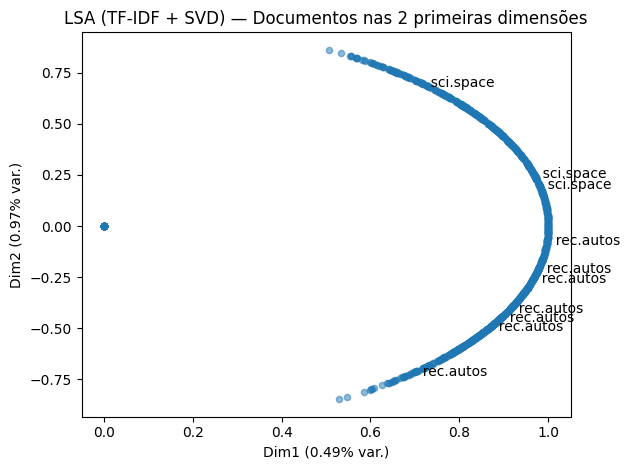

In [1]:
# %%
# =========================
# LSA (Latent Semantic Analysis) com TF-IDF + SVD
# =========================
# - Carrega corpus (20newsgroups)
# - Vetoriza com TF-IDF
# - Reduz dimensionalidade com TruncatedSVD (SVD)
# - Mostra top termos por dimensão latente
# - Plota documentos nas 2 primeiras dimensões

from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import Normalizer
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 1) Dados
categorias = ["sci.space", "rec.autos"]
dados = fetch_20newsgroups(subset="train",
                           categories=categorias,
                           remove=("headers", "footers", "quotes"))
textos = dados.data
y = dados.target
nomes_cat = dados.target_names

print("Categorias:", nomes_cat)
print("Total de documentos:", len(textos))

# 2) TF-IDF
tfidf = TfidfVectorizer(max_df=0.6, min_df=5,
                        stop_words="english")  # remove termos muito comuns e muito raros
X = tfidf.fit_transform(textos)
termos = np.array(tfidf.get_feature_names_out())

print("Matriz TF-IDF:", X.shape)  # (n_docs, n_terms)

# 3) SVD truncado (LSA)
k = 2  # dimensões latentes para visualização (aumente para análise; ex.: 50, 100)
svd = TruncatedSVD(n_components=k, random_state=42)
X_lsa = svd.fit_transform(X)

# (opcional) normalização para comparar direções
X_lsa_norm = Normalizer(copy=False).fit_transform(X_lsa)

print("\nValores singulares e variância explicada por dimensão:")
for i, (s, r) in enumerate(zip(svd.singular_values_, svd.explained_variance_ratio_)):
    print(f"  Dim{i+1}: singular={s:.3f}, explicada={100*r:.2f}%")
print(f"Variância explicada acumulada: {100*svd.explained_variance_ratio_.sum():.2f}%")

# 4) Top termos por dimensão (carregamentos)
# Cada dimensão tem "pesos" nos termos via componentes em Vt (ou .components_ no sklearn)
def top_termos_por_dim(components, termos, top=12):
    for dim, vec in enumerate(components, start=1):
        idx = np.argsort(vec)[::-1][:top]
        print(f"\n== Dimensão {dim} | Top {top} termos ==")
        for j in idx:
            print(f"{termos[j]}  ({vec[j]:.4f})")

top_termos_por_dim(svd.components_, termos, top=12)

# 5) Tabela de projeções de alguns documentos
df_proj = pd.DataFrame(X_lsa_norm, columns=[f"Dim{i+1}" for i in range(k)])
df_proj["categoria"] = [nomes_cat[i] for i in y]
print("\n=== Projeções (amostra de 6 docs) ===")
display(df_proj.sample(6, random_state=0))

# 6) Gráfico 2D de documentos nas duas primeiras dimensões
plt.figure()
plt.scatter(df_proj["Dim1"], df_proj["Dim2"], alpha=0.5, s=20)
# rótulos de poucos pontos para não poluir (aqui, só 10 exemplos aleatórios)
amostra_idx = df_proj.sample(10, random_state=1).index
for i in amostra_idx:
    plt.text(df_proj.loc[i, "Dim1"], df_proj.loc[i, "Dim2"], "  " + df_proj.loc[i, "categoria"], va="center")
plt.title("LSA (TF-IDF + SVD) — Documentos nas 2 primeiras dimensões")
plt.xlabel(f"Dim1 ({100*svd.explained_variance_ratio_[0]:.2f}% var.)")
plt.ylabel(f"Dim2 ({100*svd.explained_variance_ratio_[1]:.2f}% var.)")
plt.tight_layout()
plt.show()



### Leitura rápida (colar abaixo do bloco LSA)
- **Top termos por dimensão** ajudam a interpretar o “eixo semântico” latente.
- Documentos próximos no plano tendem a compartilhar **vocabulário** com pesos semelhantes.
- A **variância explicada** indica quanta estrutura foi retida nas dimensões mostradas. Para uso analítico, use **k maior** (ex.: 50 ou 100) e não apenas 2.


Total de documentos: 2335
Matriz BoW: (2335, 6340)

Perplexity (menor é melhor, relativo): 2445.6649407434

=== Tópico 0 — top 12 termos ===
          space  (555.78)
          earth  (224.27)
          orbit  (201.22)
         launch  (194.22)
          lunar  (182.16)
           moon  (167.33)
        mission  (133.14)
           time  (132.19)
     spacecraft  (120.17)
         rocket  (110.49)
          solar  (108.43)
           mars  (103.22)

=== Tópico 1 — top 12 termos ===
       armenian  (497.49)
        turkish  (474.17)
           jews  (405.73)
      armenians  (342.56)
         people  (315.26)
         turkey  (240.49)
     government  (210.49)
          turks  (200.73)
         jewish  (190.29)
          greek  (186.14)
        armenia  (183.09)
       genocide  (171.74)

=== Tópico 2 — top 12 termos ===
          space  (506.53)
            edu  (405.23)
           data  (330.84)
           nasa  (313.07)
       graphics  (227.81)
      available  (226.19)
           

,Topic0,Topic1,Topic2,Topic3,Topic4,Topic5,categoria
1058,0.263340,0.004527,0.202374,0.282138,0.243075,0.004546,sci.space
2326,0.004652,0.004657,0.004647,0.976693,0.004699,0.004652,rec.autos
655,0.002447,0.291395,0.002429,0.002444,0.652297,0.048988,talk.politics.mideast
898,0.255804,0.079147,0.184527,0.004117,0.372196,0.104210,sci.space
1918,0.557969,0.005268,0.165383,0.005234,0.005235,0.260910,comp.graphics
224,0.074123,0.001776,0.001792,0.001787,0.001779,0.918744,comp.graphics


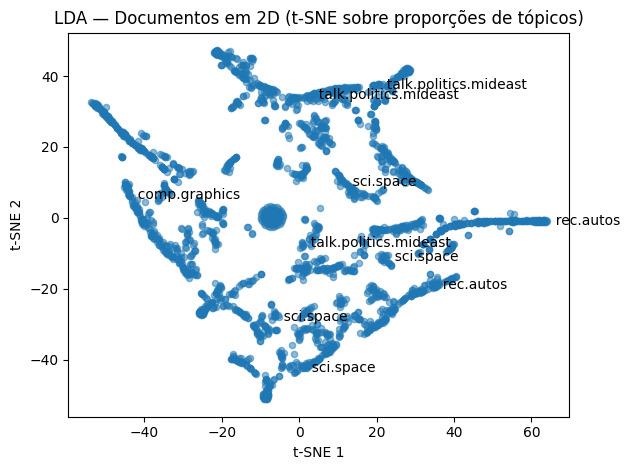

In [ ]:
# %%
# =========================
# LDA (Latent Dirichlet Allocation) — Extração de Tópicos
# =========================
# - Usa CountVectorizer (BoW) com filtros básicos
# - Ajusta LDA com K tópicos
# - Imprime termos mais prováveis por tópico
# - Mostra distribuição documento→tópicos para alguns docs
# - (opcional) reduz para 2D com t-SNE para visualizar documentos por tópicos

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.manifold import TSNE

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 1) Dados (reaproveita os mesmos textos e y se existirem)
try:
    textos
    y
    nomes_cat
except NameError:
    from sklearn.datasets import fetch_20newsgroups
    categorias = ["sci.space", "rec.autos"]
    dados = fetch_20newsgroups(subset="train",
                               categories=categorias,
                               remove=("headers", "footers", "quotes"))
    textos = dados.data
    y = dados.target
    nomes_cat = dados.target_names

print("Total de documentos:", len(textos))

# 2) BoW (CountVectorizer)
bow = CountVectorizer(max_df=0.6, min_df=5, stop_words="english")
X_bow = bow.fit_transform(textos)
vocab = np.array(bow.get_feature_names_out())
print("Matriz BoW:", X_bow.shape)

# 3) Ajuste do LDA
K = 6  # número de tópicos (ajuste conforme corpus)
lda = LatentDirichletAllocation(n_components=K,
                                learning_method="batch",
                                random_state=42,
                                max_iter=20,
                                evaluate_every=5,
                                n_jobs=-1)
doc_topic = lda.fit_transform(X_bow)  # distribuição doc→tópicos

print("\nPerplexity (menor é melhor, relativo):", lda.perplexity(X_bow))

# 4) Top termos por tópico
def mostrar_top_termos(lda_model, vocab, topn=12):
    for k, comp in enumerate(lda_model.components_):
        idx = np.argsort(comp)[::-1][:topn]
        termos = [vocab[i] for i in idx]
        pesos = [comp[i] for i in idx]
        print(f"\n=== Tópico {k} — top {topn} termos ===")
        for t, w in zip(termos, pesos):
            print(f"{t:>15s}  ({w:.2f})")

mostrar_top_termos(lda, vocab, topn=12)

# 5) Distribuição documento→tópicos (amostra)
df_doc_topic = pd.DataFrame(doc_topic, columns=[f"Topic{k}" for k in range(K)])
df_doc_topic["categoria"] = [nomes_cat[i] for i in y]
print("\n=== Distribuição doc→tópicos (amostra de 6 docs) ===")
display(df_doc_topic.sample(6, random_state=0))

# 6) Visualização 2D (t-SNE) das distribuições de tópicos dos documentos
#    Usamos as K dimensões (topic proportions) como entrada e projetamos em 2D.
tsne = TSNE(n_components=2, init="random", perplexity=30, random_state=42, learning_rate="auto")
coords = tsne.fit_transform(doc_topic)

plt.figure()
plt.scatter(coords[:, 0], coords[:, 1], alpha=0.5, s=20)
# rótulos em alguns pontos para referência
amostra_idx = np.random.default_rng(0).choice(len(textos), size=10, replace=False)
for i in amostra_idx:
    plt.text(coords[i, 0], coords[i, 1], "  " + nomes_cat[y[i]], va="center")
plt.title("LDA — Documentos em 2D (t-SNE sobre proporções de tópicos)")
plt.xlabel("t-SNE 1")
plt.ylabel("t-SNE 2")
plt.tight_layout()
plt.show()


### Leitura rápida (colar abaixo do bloco LDA)
- **Top termos por tópico** definem o “tema” de cada tópico (ex.: peças e marcas → autos; órbitas e naves → space).
- A tabela documento→tópicos mostra **misturas**; um mesmo doc pode ter mais de um tópico relevante.
- O gráfico 2D (t-SNE) projeta documentos conforme suas **proporções de tópicos**. Agrupamentos indicam documentos com mistura semelhante.
- Dicas:
  - Ajuste **K** (número de tópicos) e confira a **coerência** lendo os top termos.
  - Refine o **pré-processamento** (stopwords, lematização) para tópicos mais limpos.
  - Para usar LSA e LDA juntos: LSA para **estrutura global contínua**, LDA para **temas discretos interpretáveis**.




---



### Comparação entre LSA e LDA

| Aspecto | **LSA (Latent Semantic Analysis)** | **LDA (Latent Dirichlet Allocation)** |
|--------|-----------------------------------|-------------------------------------|
| **Base teórica** | Álgebra linear (SVD) | Modelo probabilístico bayesiano |
| **Representação dos documentos** | Vetores contínuos em espaço latente | Distribuições de probabilidade sobre tópicos |
| **Número de dimensões/tópicos** | Determinado pelo número $k$ de componentes SVD escolhidos | Determinado pelo número $K$ de tópicos definido pelo usuário |
| **Saída principal** | Coordenadas fatoriais dos documentos e termos | Tópicos como listas de termos e distribuição documento→tópicos |
| **Interpretação** | Dimensões nem sempre têm interpretação direta | Tópicos interpretáveis via termos com maior probabilidade |
| **Velocidade** | Muito rápido (SVD truncado) | Mais lento (inferência iterativa) |
| **Aplicação típica** | Redução de dimensionalidade, *search ranking*, recomendação | Descoberta de temas, análise exploratória de grandes corpora |
| **Limitação** | Pode gerar dimensões difíceis de nomear | Requer escolha adequada de $K$ e pré-processamento cuidadoso |

---

### Boas Práticas para Redução de Dimensionalidade de Texto

- **Pré-processamento é crucial:** remova stopwords, aplique lematização e normalização antes de gerar BoW/TF-IDF.
- **Escolha adequada de $k$ ou $K$:** use variância explicada para LSA ou métricas de coerência/perplexidade para LDA.
- **Valide semanticamente:** sempre leia os termos de maior peso para cada dimensão/tópico e veja se fazem sentido.
- **Use visualização com parcimônia:** t-SNE e UMAP são úteis, mas podem distorcer distâncias; não interprete clusters como categorias fixas sem validação.
- **Combine métodos:** LSA para reduzir ruído e LDA para interpretação de tópicos pode ser uma boa estratégia para corpus grandes.
- **Documente o pipeline:** registre parâmetros, vocabulário usado e filtros aplicados para garantir reprodutibilidade.




---



## 7. Cuidados Metodológicos

Para garantir qualidade e credibilidade na análise de dados qualitativos assistida por computador, é importante observar:

### 7.1 Pré-processamento e Representação
- Evite **ponderações arbitrárias** de categorias ou termos. Prefira métodos formais como TF-IDF para pesos.
- Garanta **consistência no pré-processamento**: normalize texto, remova stopwords e trate categorias raras.

### 7.2 Validação dos Resultados
- **Verifique a coerência semântica** de dimensões/tópicos: leia exemplos de documentos de cada grupo ou de cada extremidade do eixo.
- Use **medidas de qualidade**:
  - LSA: proporção da variância explicada.
  - LDA: perplexidade e métricas de coerência.
  - Coocorrência: visualize clusters e verifique se fazem sentido no contexto.

### 7.3 Interpretação
- Lembre que métodos como CA, MCA, LSA e LDA são **descritivos**. A proximidade no espaço fatorial não implica causalidade.
- Evite **superinterpretação** de dimensões que explicam pouca inércia ou tópicos com baixa coerência.

### 7.4 Visualização
- Ao usar mapas perceptuais ou t-SNE/UMAP:
  - Mostre a proporção de variância explicada.
  - Informe quando pontos estão mal representados (baixo $\cos^2$ ou baixa contribuição).
  - Use cores e legendas para facilitar a interpretação, mas não force agrupamentos.

---

## 8. Conclusão

A análise de dados qualitativos com suporte computacional amplia a capacidade de exploração de grandes volumes de informação, permitindo:

- **Detectar padrões e associações** entre categorias ou termos.
- **Reduzir dimensionalidade** para revelar estruturas latentes.
- **Visualizar relações** em mapas fatoriais ou projeções de tópicos.

Entretanto, o papel do analista continua central: é ele quem garante a **interpretação correta** dos resultados, contextualiza as descobertas e evita conclusões precipitadas.  
A integração de métodos como **CA/MCA**, **coocorrência**, **LSA** e **LDA** oferece um conjunto poderoso de ferramentas para transformar dados qualitativos em insights acionáveis.




---

